<H1> Importing and Exploring Provided Datasets </H1>

<H4> Import the necessary packages.</H4>

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

*Bring in the file names for easy access.*

In [3]:
zippedData = ['bom.movie_gross.csv.gz','imdb.name.basics.csv.gz','imdb.title.akas.csv.gz',
              'imdb.title.basics.csv.gz','imdb.title.crew.csv.gz',
              'imdb.title.principals.csv.gz','imdb.title.ratings.csv.gz',
              'rt.movie_info.tsv.gz','rt.reviews.tsv.gz','tmdb.movies.csv.gz',
              'tn.movie_budgets.csv.gz']

In [4]:
bom_movie_gross = pd.read_csv("zippedData/{}".format(zippedData[0]))
imdb_name = pd.read_csv("zippedData/{}".format(zippedData[1]))
imdb_title_aka = pd.read_csv("zippedData/{}".format(zippedData[2]))
imdb_title_basics = pd.read_csv("zippedData/{}".format(zippedData[3]))
imdb_title_crew = pd.read_csv("zippedData/{}".format(zippedData[4]))
imdb_title_principals = pd.read_csv("zippedData/{}".format(zippedData[5]))
imdb_title_rating = pd.read_csv("zippedData/{}".format(zippedData[6]))
rt_movie_info = pd.read_csv("zippedData/{}".format(zippedData[7]),sep='\t')
df8 = pd.read_csv("zippedData/{}".format(zippedData[8]),sep='\t',encoding='latin1')
tmdb_movies = pd.read_csv("zippedData/{}".format(zippedData[9]))
tn_movie_budget = pd.read_csv("zippedData/{}".format(zippedData[10]))

In this section we combined a few IMDB mini dataframes to make one joint one. Using this dataframe, we were able to explore which genres held the highest ratings in the last 20 years, and which directors have high ratings. 

First, we merged the data sets.

In [5]:
imdb=imdb_title_rating.merge(imdb_title_principals,on='tconst')
imdb=imdb.merge(imdb_title_basics,on='tconst')
imdb=imdb.merge(imdb_name,on='nconst')
imdb=imdb.merge(imdb_title_crew,on='tconst')
imdb.head()

,tconst,averagerating,numvotes,ordering,nconst,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers
0,tt10356526,8.3,31,10,nm8994524,production_designer,NaN,NaN,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Kazi Rafik Ali,NaN,NaN,"production_designer,art_department","tt9190740,tt2837596,tt4773212,tt8749962",nm8353804,"nm3057599,nm4179342"
1,tt10356526,8.3,31,1,nm4718369,actor,NaN,"[""Sukh""]",Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Harish Verma,NaN,NaN,actor,"tt3265542,tt7246718,tt8108168,tt3331954",nm8353804,"nm3057599,nm4179342"
2,tt10356526,8.3,31,2,nm10007357,actress,NaN,"[""Raunak""]",Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Roopi Gill,NaN,NaN,actress,"tt8749962,tt9260244,tt8785138",nm8353804,"nm3057599,nm4179342"
3,tt10356526,8.3,31,3,nm8743259,actress,NaN,"[""Jaanpreet""]",Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Rubina Bajwa,NaN,NaN,actress,"tt8125398,tt7897324,tt10081104,tt6476532",nm8353804,"nm3057599,nm4179342"
4,tt10356526,8.3,31,4,nm3760302,actor,NaN,"[""Garry Randhawa""]",Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Amrinder Gill,NaN,NaN,"actor,music_department,soundtrack","tt4846952,tt5569468,tt6882872,tt8749962",nm8353804,"nm3057599,nm4179342"


Next, we pulled the relevant columns, dropped duplicates and dropped mising values.

In [6]:
imdb=imdb[['original_title','genres','start_year','averagerating','category','primary_profession','primary_name']].where(imdb['start_year']>2000)
imdb['original_title'].drop_duplicates(inplace=True)
#imdb.dropna(inplace=True)


For the first question, which genres have the highest rating, we pulled the two columns that we needed: average rating and genres. 

In [7]:
imdb_genre_rating=imdb[['genres','averagerating','primary_profession','primary_name','category']]
imdb_genre_rating.head()

,genres,averagerating,primary_profession,primary_name,category
0,Romance,8.3,"production_designer,art_department",Kazi Rafik Ali,production_designer
1,Romance,8.3,actor,Harish Verma,actor
2,Romance,8.3,actress,Roopi Gill,actress
3,Romance,8.3,actress,Rubina Bajwa,actress
4,Romance,8.3,"actor,music_department,soundtrack",Amrinder Gill,actor


Since some of the data in the genre column contained more than one genre, we had to split the column into three seperate columns and then return them into one column.

In [8]:
imdb_genre_rating[["One","Two","Three"]]=imdb_genre_rating.genres.str.split(pat=',', n=- 1, expand=True)
imdb_genre_rating_one=imdb_genre_rating[['One','averagerating','primary_name','category']]
imdb_genre_rating_two=imdb_genre_rating[['Two','averagerating','primary_name','category']]    
imdb_genre_rating_three=imdb_genre_rating[['Three','averagerating','primary_name','category']]
imdb_genre_rating_one=imdb_genre_rating_one.rename(columns={"One":"Genre"})
imdb_genre_rating_two=imdb_genre_rating_two.rename(columns={"Two":"Genre"})
imdb_genre_rating_three=imdb_genre_rating_three.rename(columns={"Three":"Genre"})
genre_rating=pd.concat([imdb_genre_rating_three,imdb_genre_rating_two,imdb_genre_rating_one])
genre_rating


C:\Users\weinb\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Genre,averagerating,primary_name,category
0,None,8.3,Kazi Rafik Ali,production_designer
1,None,8.3,Harish Verma,actor
2,None,8.3,Roopi Gill,actress
3,None,8.3,Rubina Bajwa,actress
4,None,8.3,Amrinder Gill,actor
...,...,...,...,...
629593,Horror,3.5,Hannah Collett Schmidt,actor
629594,Documentary,4.3,Alex Bobulinski,self
629595,Documentary,4.3,Steve Brodt,self
629596,Documentary,4.3,Keith Campbell,self


We dropped the genre catergories that weren't technically movies, and the ones that have a very low average rating. 

In [9]:
genre_rating=genre_rating[genre_rating.Genre != 'Music']
genre_rating=genre_rating[genre_rating.Genre != 'Reality-TV']
genre_rating=genre_rating[genre_rating.Genre != 'News']
genre_rating=genre_rating[genre_rating.Genre != 'Game-Show']
genre_rating=genre_rating[genre_rating.Genre != 'Short']
genre_rating=genre_rating[genre_rating.Genre != 'Horror']
genre_rating=genre_rating[genre_rating.Genre != 'Western']
genre_rating=genre_rating[genre_rating.Genre != 'Thriller']
genre_rating=genre_rating[genre_rating.Genre != 'Sci-Fi']
genre_rating=genre_rating[genre_rating.Genre != 'Adult']
genre_rating

,Genre,averagerating,primary_name,category
0,None,8.3,Kazi Rafik Ali,production_designer
1,None,8.3,Harish Verma,actor
2,None,8.3,Roopi Gill,actress
3,None,8.3,Rubina Bajwa,actress
4,None,8.3,Amrinder Gill,actor
...,...,...,...,...
629585,Documentary,8.6,Paula Olaz,composer
629594,Documentary,4.3,Alex Bobulinski,self
629595,Documentary,4.3,Steve Brodt,self
629596,Documentary,4.3,Keith Campbell,self


Next, we plotted the median user rating of each genre.

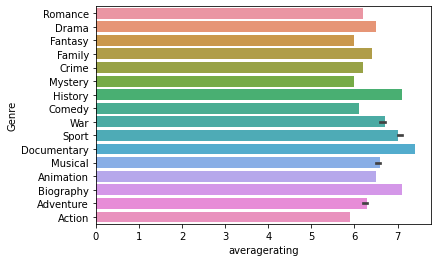

In [10]:
from numpy import median
ax3 = sns.barplot(x="averagerating", y="Genre", data=genre_rating, estimator=median)

Next, we plotted the mean user rating of each genre.

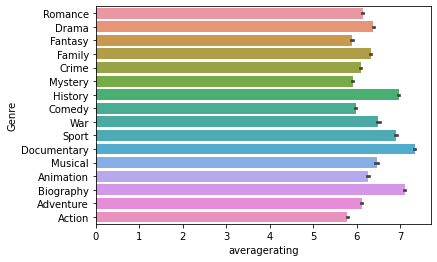

In [11]:
from numpy import mean
ax3 = sns.barplot(x="averagerating", y="Genre", data=genre_rating, estimator=mean)

Next we looked at the overall distribution of the user ratings among the different genres 

Text(0.5, 1.0, 'Distribution of User Rating in Each Genre ')

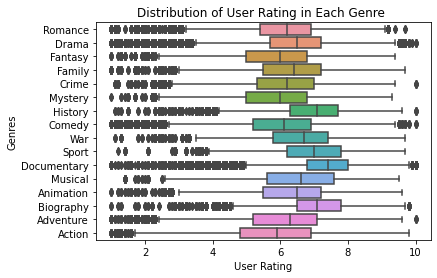

In [12]:
ax= sns.boxplot(x="averagerating",y="Genre",data=genre_rating)
ax.set_xlabel("User Rating")
ax.set_ylabel("Genres")
ax.set_title("Distribution of User Rating in Each Genre ")

In this section we looked at which directors had the highest ratings. We filtered the column category,which contained people's professions, to display only directors. We grouped them by genre and name to see which directors name films in what genres. 

In [13]:
genre_rating1=genre_rating[genre_rating['category'].str.contains('director')]
genre_rating1 = genre_rating1[['Genre','averagerating','primary_name']].groupby(['Genre','primary_name']).mean().reset_index()

Next we ordered the directors in each sections by their average ratings and selected the top 5 in each category. 

In [16]:
import pandas as pd
import pandasql as ps
query = """ SELECT Genre, primary_name, averagerating,
        ROW_NUMBER() OVER (PARTITION BY Genre ORDER BY 
        averagerating DESC) AS a_rank FROM genre_rating1"""
df_rank_by_group = ps.sqldf(query, locals())
df_rank_by_group_1=df_rank_by_group[df_rank_by_group.a_rank <=5]
df_rank_by_group_1

,Genre,primary_name,averagerating,a_rank
0,Action,Motoki Tanaka,9.8,1
1,Action,Himesh Bhargo,9.4,2
2,Action,Marc Levin,9.4,3
3,Action,Mark Benjamin,9.4,4
4,Action,Mary Healey Jamiel,9.4,5
...,...,...,...,...
90352,War,Luc Côté,9.7,1
90353,War,Matthew Millan,9.4,2
90354,War,Soheil Salimi,9.4,3
90355,War,Alper Caglar,9.3,4


We then plotted the information.To see the graphs of the top 5 directors in each genre please see the images file. 

In Conclusion, all of the genres contained a range of ratings, most centering around the 6-7 range. While biography, documentary, sport, history and war were rated overall, many other genres can produce a high rating with the right other factors. Directors is another category that can affect the rating. Above you'll find a break down of the 5 highest rated directors per genre. 